# 04. PyTorch Custom Datasets Video Notebook
We've used some datasets with PyTorch before.
But how do you get your own data into PyTorch?
One of the ways to do so is via: custom datasets.
## Domain libraries
Depending on what you're working on, vision, text, audio, recommendation, you'11
want to look into each of the PyTorch domain libraries for existing data loading
functions and customizable data loading functions.
 
**Resources:**
* Book version of the course materials for 04: https://www.learnpytorch.io/
04_ pytorch_custom _datasets/
* Ground truth version of notebook 04: https://github.com/mrdbourke/
pytorch-deep-learning/blob/main/04 _pytorch_custom_datasets.ipynb

In [175]:
import torch
from torch import nn



In [176]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 1. Get some data

Start small and upgrade as necessary.

e.g. A subset of a large dataset.

## 1. Get data
Our dataset is a subset of the Food101 dataset.
Food101 starts 101 different classes of food and 1000 images per class (750
training, 250 testing).
Our dataset starts with 3 classes of food and only 108 of the images (-75 training,
25 testing).

Why do this?

When starting out ML projects, it's important to try things on a small scale and
then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.

In [177]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exists, download it and prepare it....
if image_path.is_dir():
    print(f"{image_path} directory already exists, skipping download")
else:
    print(f"{image_path} directory does not exist, creating one....")

# Download pizza, steak and sushi data
with open("data/pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Download pizza, steak and sushi data....")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile("data/pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data....")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists, skipping download
Download pizza, steak and sushi data....
Unzipping pizza, steak and sushi data....


## 2. Becoming one with the data (data preparation and data exploration)

In [178]:
import os
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [179]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [180]:
# Setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualzing and image
Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image With Python's PIL
5. We'll then show the image and print the metadata

Random image path: data/pizza_steak_sushi/test/steak/3873283.jpg
Image class: steak
Image height: 512
Image width: 512


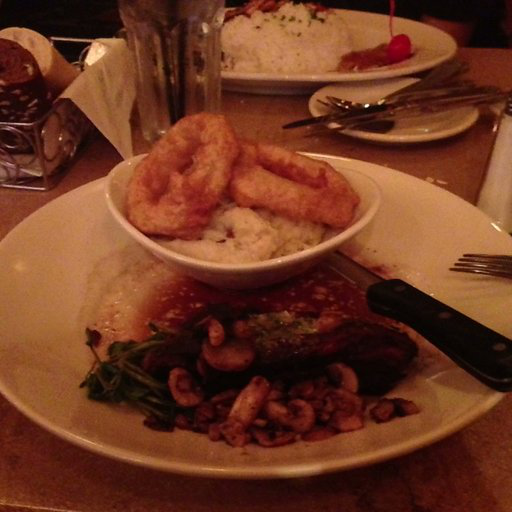

In [181]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all image file paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image
random_image_path = random.choice(image_path_list)


# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem


# 4. Open the image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

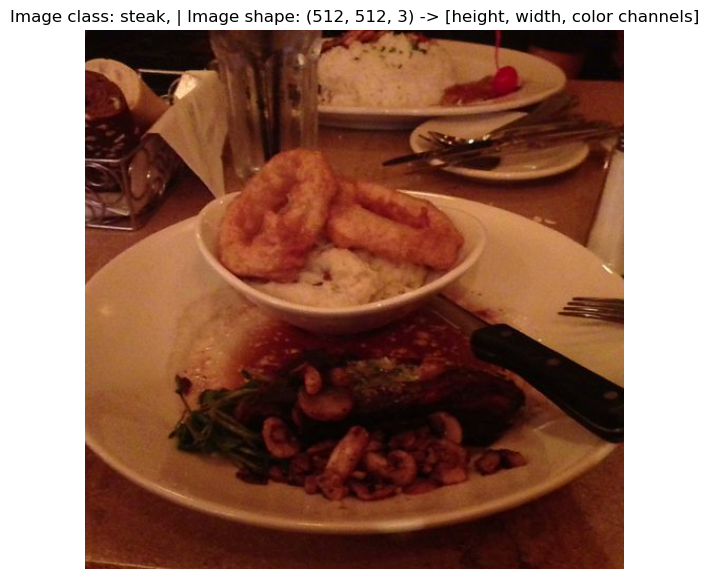

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.array(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class}, | Image shape: {img_as_array.shape} -> [height, width, color channels]")
plt.axis(False);

In [183]:
img_as_array

array([[[ 38,  23,  20],
        [ 30,  16,  13],
        [ 22,   8,   5],
        ...,
        [ 43,   4,   7],
        [ 47,   5,   7],
        [ 49,   7,   9]],

       [[ 36,  21,  18],
        [ 28,  14,  11],
        [ 21,   7,   6],
        ...,
        [ 44,   5,   8],
        [ 48,   6,   8],
        [ 51,   9,  11]],

       [[ 32,  18,  15],
        [ 25,  11,   8],
        [ 19,   5,   4],
        ...,
        [ 46,   7,  10],
        [ 49,   9,  10],
        [ 52,  10,  12]],

       ...,

       [[ 95,  28,  11],
        [ 98,  31,  14],
        [100,  33,  16],
        ...,
        [120,  50,  24],
        [119,  49,  23],
        [118,  48,  22]],

       [[ 83,  16,   0],
        [ 89,  22,   6],
        [ 94,  26,  13],
        ...,
        [120,  50,  24],
        [120,  50,  24],
        [120,  50,  24]],

       [[ 86,  18,   5],
        [ 86,  18,   5],
        [ 86,  18,   7],
        ...,
        [117,  47,  21],
        [122,  52,  26],
        [126,  56,  30]]

## Transforming data to tensors

Before we can use our data with PyTorch: 
1. Turn your target data into tensors (in our case, numerical representation or our images.)
   
2. Turn it into a torch.utils.data.Dataset and subsequently a torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`.


In [184]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with torchvision.transforms
Transforms help you get your images ready to be used with a model/perform augmentation

### 3.1 Transforming data with torchvision.transforms


In [185]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize((64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a PyTorch tensor
    transforms.ToTensor()
    ])

In [186]:
data_transform(img).dtype

torch.float32

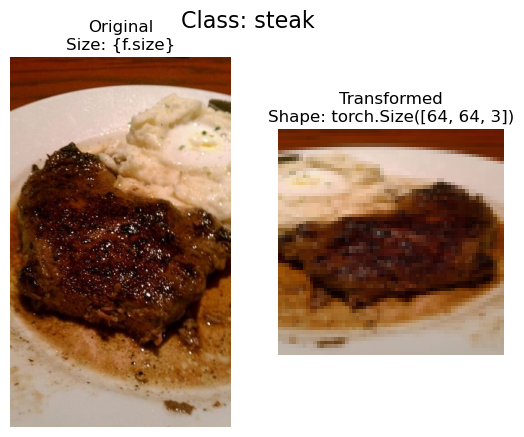

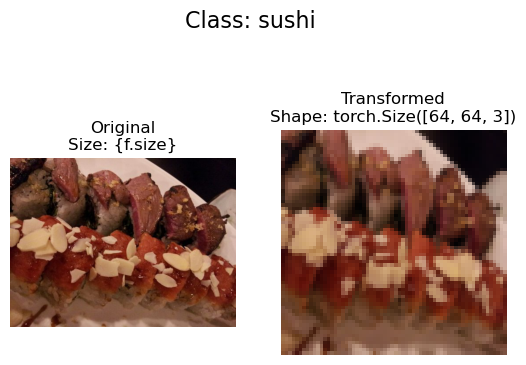

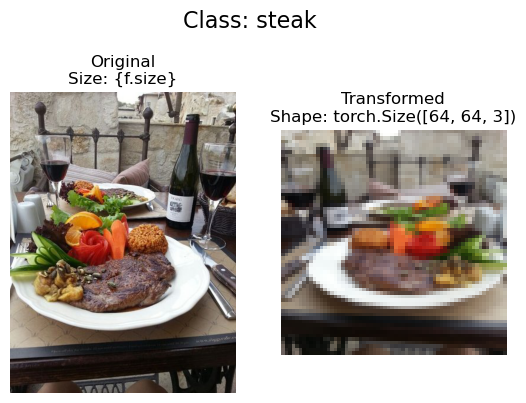

In [187]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """
    Picks n random images from image_paths and plots them with the given transforms.
    """
    # Set seed
    if seed:
        random.seed(seed)
    # Pick random images
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title("Original\nSize: {f.size}")
            ax[0].axis("off") 

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib matplotlib (C, H, W) →> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            
plot_transformed_images(image_paths=image_path_list, transform=data_transform, 
                        n=3,
                        seed=None)

## 4. Option 1: Loading image data using 'ImageFolder'

We can load image classification data using `torchvision.datasets. ImageFolder`.

In [188]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, 
                         transform=data_transform, # transform for the data
                         target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [189]:
# Get classnames as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [190]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [191]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [192]:
train_data.samples

[('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1033251.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1044789.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1089334.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1105700.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/12301.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1285298.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/138855.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1412034.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1524655.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1572608.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1633289.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1649276.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1654444.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1660415.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1899785.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1947572.jpg', 0),
 ('data/pizza_steak_sushi/train/pizza/1968947.jpg',

In [193]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")



Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color channels, height, width]
Image permut: torch.Size([64, 64, 3]) -> [height, width, color channels]


Text(0.5, 1.0, 'pizza')

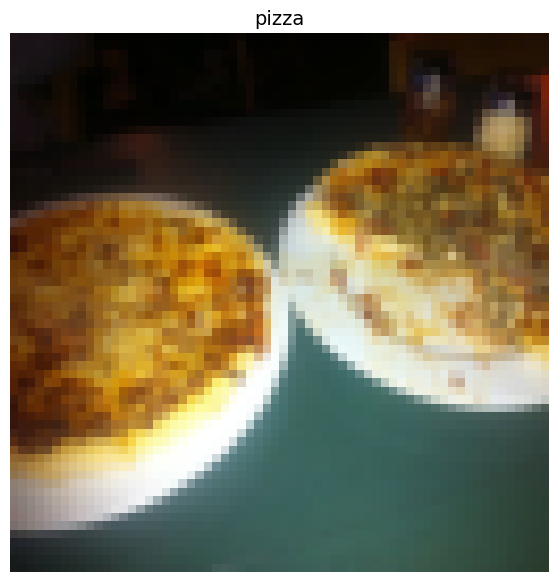

In [194]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color channels, height, width]")
print(f"Image permut: {img_permute.shape} -> [height, width, color channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)





### 4.1 Turn loaded images into 'DataLoader''s
A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can
customise the `batch_size` so our model can see `batch_size` images at a time.

In [195]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True) # shuffle=True so the data is shuffled randomly on every epoch
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False) # shuffle=False so we can plot the images later on

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x169760040>,
 <torch.utils.data.dataloader.DataLoader at 0x169760190>)

In [196]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [197]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch size, color channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch size, color channels, height, width]
Label shape: torch.Size([1])


## 5 Option 2: Loading Image Data with a Custom `Dataset`
1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:
* Can create a 'Dataset' out of almost anything
* Not limited to PyTorch pre-built 'Dataset' functions

Cons:
* Even though you could create 'Dataset" out of almost anything, it doesn't mean it
will work…
* Using a custom "Dataset" often results in us writing more code, which could be
prone to errors or performance issues

All custome datasets in PyTorch, ofter subclass something - https://pytorch.org/docs/stable/data.htm|#torch.utils.data.Dataset



In [198]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [199]:
# Instance of torchvision.datasets. ImageFolder ()
train_data.classes, train_data.class_to_idx


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names 

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally
the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be
something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.

In [200]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found  = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [201]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory."""
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    #2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}...please check file structure.")
    
    # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)

    
    return classes, class_to_idx



In [202]:
find_classes(target_directory)

NameError: name 'class_to_idx' is not defined